In [58]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [59]:
# Load the dataset
movies_data = pd.read_csv(r'IMDB_movie_data.csv')
print(movies_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


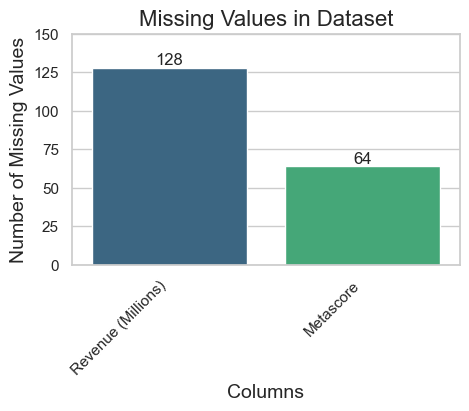

In [60]:
# Checking the dataset for missing values
missing_values = movies_data.isna().sum()

# Filter out columns with 0 missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values using seaborn
plt.figure(figsize=(5, 3))
bar_plot = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Adding title and labels
plt.title('Missing Values in Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')

# Setting y-axis limits to improve readability
bar_plot.set_ylim(0,150)

# Adding data labels
for i, value in enumerate(missing_values.values):
    bar_plot.annotate(f'{value}', xy=(i, value), ha='center', va='bottom')

# Display the plot
plt.show()

In [61]:
movie_cleared = movies_data.dropna()
missing_values = movie_cleared.isna().sum()
if missing_values.sum() > 0:
    print(missing_values)
else:
    print("No empty fields are available.")

No empty fields are available.


In [62]:
# Describing the dataset
columns_to_describe = ["Metascore", "Revenue (Millions)", "Runtime (Minutes)"]
print(movie_cleared[columns_to_describe].describe())

        Metascore  Revenue (Millions)  Runtime (Minutes)
count  838.000000          838.000000         838.000000
mean    59.575179           84.564558         114.638425
std     16.952416          104.520227          18.470922
min     11.000000            0.000000          66.000000
25%     47.000000           13.967500         101.000000
50%     60.000000           48.150000         112.000000
75%     72.000000          116.800000         124.000000
max    100.000000          936.630000         187.000000


In [63]:
# Summary of dataset elements 

#Metascore groups 
movie_cleared_metascore = movie_cleared["Metascore"]
high_metascore = movie_cleared_metascore >=60
middle_metascore = (movie_cleared_metascore <60) & (movie_cleared_metascore >30)
low_metascore   =  movie_cleared_metascore <=30

#Revenue groups
movie_cleared_revenue = movie_cleared["Revenue (Millions)"]
high_revenue = movie_cleared_revenue >= movie_cleared_revenue.mean()
middle_revenue = (movie_cleared_revenue < movie_cleared_revenue.mean()) & (movie_cleared_revenue > movie_cleared_revenue.mean()/2)
low_revenue = movie_cleared_revenue <= movie_cleared_revenue.mean()/2


In [64]:
# Top 10 directors with the highest average metascore, only including directors with at least 10 movies
min_metascore_count = 3
top_directors = movie_cleared.groupby("Director")["Metascore"].agg([np.min, np.max, np.mean, "size"])
top_directors = top_directors.rename(columns={"amin": "Min Metascore", "amax": "Max Metascore", "mean": "Average Metascore", "size": "Count"})
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]
top_directors = top_directors.sort_values("Average Metascore", ascending=False).head(10)
print(top_directors)

                             Min Metascore  Max Metascore  Average Metascore  \
Director                                                                       
Wes Anderson                          83.0           88.0          85.000000   
Steve McQueen                         72.0           96.0          83.333333   
Ethan Coen                            72.0           91.0          81.000000   
David Fincher                         70.0           95.0          78.600000   
Alejandro González Iñárritu           69.0           88.0          77.666667   
Edgar Wright                          69.0           81.0          77.000000   
Martin Scorsese                       63.0           85.0          77.000000   
Guillermo del Toro                    64.0           98.0          76.500000   
David O. Russell                      56.0           90.0          76.500000   
Brad Bird                             60.0           96.0          76.333333   

                             Count  
Di

In [65]:
min_metascore_count = 3

# Top 10 directors with the highest average metascore, including revenue information
top_directors = movie_cleared.groupby("Director").agg({
    "Metascore": ["size", np.min, np.max, np.mean],
    "Revenue (Millions)": [np.min, np.max, np.mean]
}).round()
top_directors.columns = ["Count", "Min Mtscore", "Max Mtscore", "Avg Mtscore", "Min Rev mln","Max Rev mln", "Avg Rev mln"]
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]

# Sort by average metascore in descending order and get the top 10 directors
top_directors_rev = top_directors.sort_values(["Avg Rev mln","Avg Mtscore"],ascending=False).head(10)
top_directors_mtscore = top_directors.sort_values(["Avg Mtscore","Avg Rev mln"],ascending=False).head(10)
print(top_directors)

                             Count  Min Mtscore  Max Mtscore  Avg Mtscore  \
Director                                                                    
Adam McKay                       4         51.0         81.0         66.0   
Alejandro González Iñárritu      3         69.0         88.0         78.0   
Alexandre Aja                    3         46.0         53.0         50.0   
Antoine Fuqua                    5         41.0         57.0         52.0   
Ben Affleck                      4         49.0         86.0         70.0   
...                            ...          ...          ...          ...   
Tom Tykwer                       3         55.0         58.0         56.0   
Wes Anderson                     3         83.0         88.0         85.0   
Will Gluck                       3         33.0         72.0         56.0   
Woody Allen                      5         54.0         81.0         69.0   
Zack Snyder                      5         33.0         56.0         48.0   

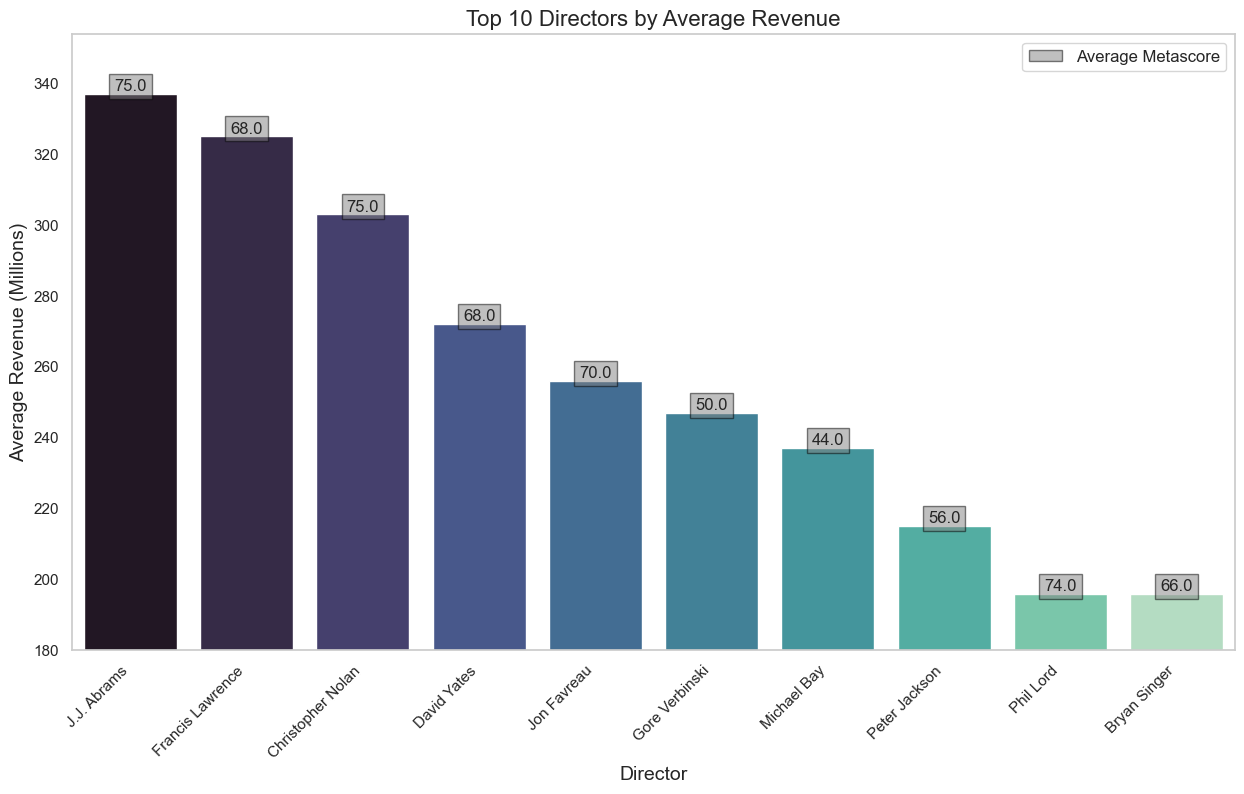

In [66]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_rev.index,
    y=top_directors_rev["Avg Rev mln"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Revenue (Millions)", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(180)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_rev.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Mtscore"]:.1f}', 
        xy=(i, row["Avg Rev mln"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Metascore')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()


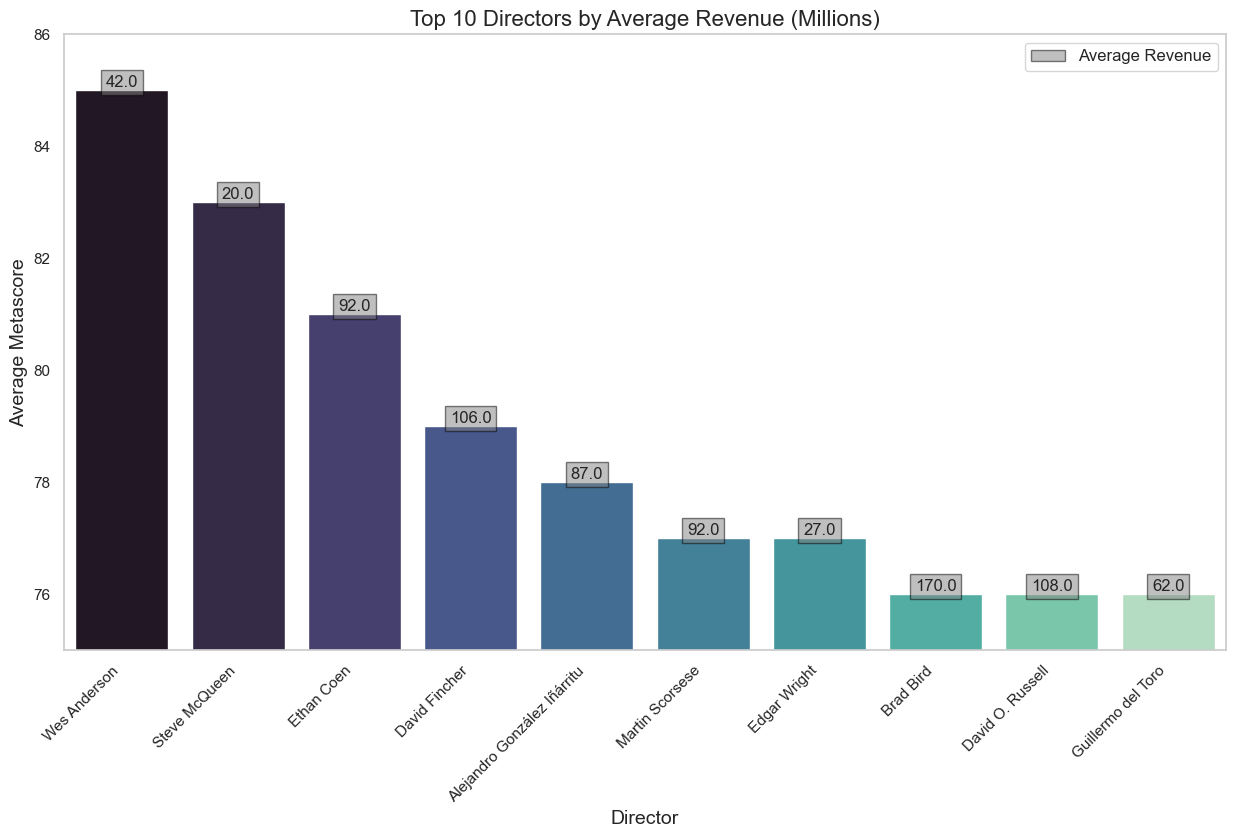

In [67]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_mtscore.index,
    y=top_directors_mtscore["Avg Mtscore"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue (Millions)", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Metascore", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(75, 86)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_mtscore.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Rev mln"]:.1f}', 
        xy=(i, row["Avg Mtscore"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Revenue')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()

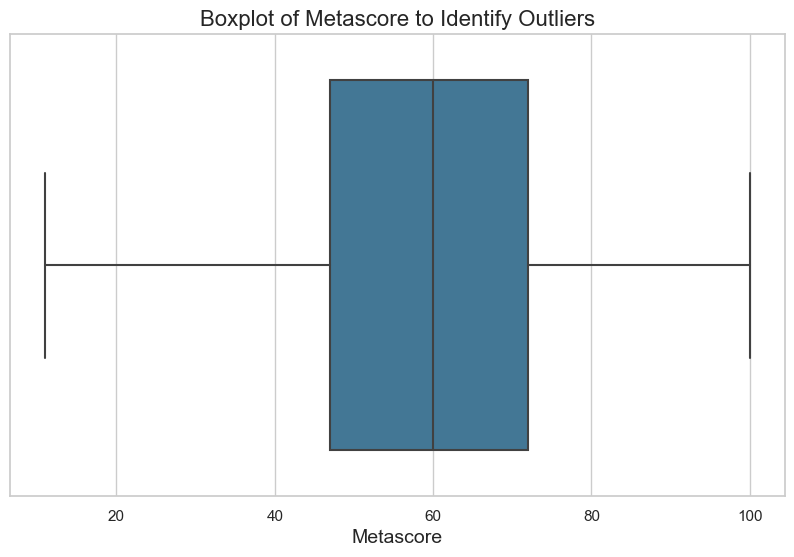

Outliers in Metascore:
Empty DataFrame
Columns: [Title, Director, Metascore]
Index: []
No outliers found in the Metascore column.


In [68]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the boxplot for Metascore to identify outliers
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=movie_cleared["Metascore"], palette="mako")

# Adding title and labels
box_plot.set_title("Boxplot of Metascore to Identify Outliers", fontsize=16)
box_plot.set_xlabel("Metascore", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1 = movie_cleared["Metascore"].quantile(0.25)
Q3 = movie_cleared["Metascore"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_metascore = movie_cleared[(movie_cleared["Metascore"] < lower_bound) | (movie_cleared["Metascore"] > upper_bound)]
print("Outliers in Metascore:")
print(outliers_metascore[["Title", "Director", "Metascore"]])

if not outliers_metascore.empty:
    # Visualizing the outliers
    plt.figure(figsize=(15, 8))
    outliers_plot = sns.scatterplot(
        x=outliers_metascore["Title"],
        y=outliers_metascore["Metascore"],
        hue=outliers_metascore["Director"],
        palette="mako",
        s=100
    )

    # Adding title and labels
    outliers_plot.set_title("Outliers in Metascore", fontsize=16)
    outliers_plot.set_xlabel("Movie Title", fontsize=14)
    outliers_plot.set_ylabel("Metascore", fontsize=14)

    # Rotating x-axis labels for better readability
    outliers_plot.set_xticklabels(outliers_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Display the plot
    plt.show()

    # Saving outliers to a CSV file
    outliers_metascore.to_csv("outliers_metascore.csv", index=False)
else:
    print("No outliers found in the Metascore column.")

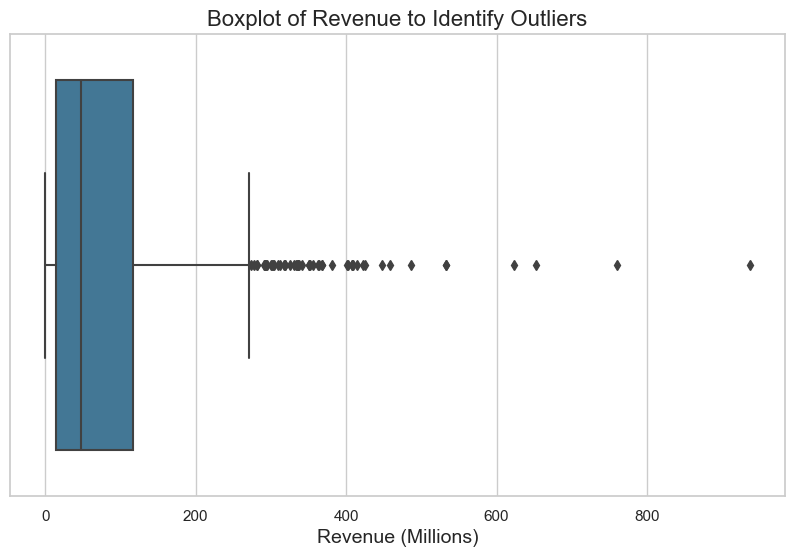

Outliers in Revenue:


,Title,Director,Revenue (Millions)
0,Guardians of the Galaxy,James Gunn,333.13
4,Suicide Squad,David Ayer,325.02
12,Rogue One,Gareth Edwards,532.17
15,The Secret Life of Pets,Chris Renaud,368.31
33,Deadpool,Tim Miller,363.02
35,Captain America: Civil War,Anthony Russo,408.08
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63
54,The Dark Knight,Christopher Nolan,533.32
60,Batman v Superman: Dawn of Justice,Zack Snyder,330.25
74,Zootopia,Byron Howard,341.26


In [69]:
# Plotting the boxplot for Revenue to identify outliers
plt.figure(figsize=(10, 6))
box_plot_revenue = sns.boxplot(x=movie_cleared["Revenue (Millions)"], palette="mako")

# Adding title and labels
box_plot_revenue.set_title("Boxplot of Revenue to Identify Outliers", fontsize=16)
box_plot_revenue.set_xlabel("Revenue (Millions)", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1_revenue = movie_cleared["Revenue (Millions)"].quantile(0.25)
Q3_revenue = movie_cleared["Revenue (Millions)"].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = movie_cleared[(movie_cleared["Revenue (Millions)"] < lower_bound_revenue) | (movie_cleared["Revenue (Millions)"] > upper_bound_revenue)]


if not outliers_revenue.empty:
    # Displaying outliers as a table
    print("Outliers in Revenue:")
    display(outliers_revenue[["Title", "Director", "Revenue (Millions)"]])
    
    # Saving outliers to a CSV file
    outliers_revenue.to_csv("outliers_revenue.csv", index=False)
else:
    print("No outliers found in the Revenue column.")


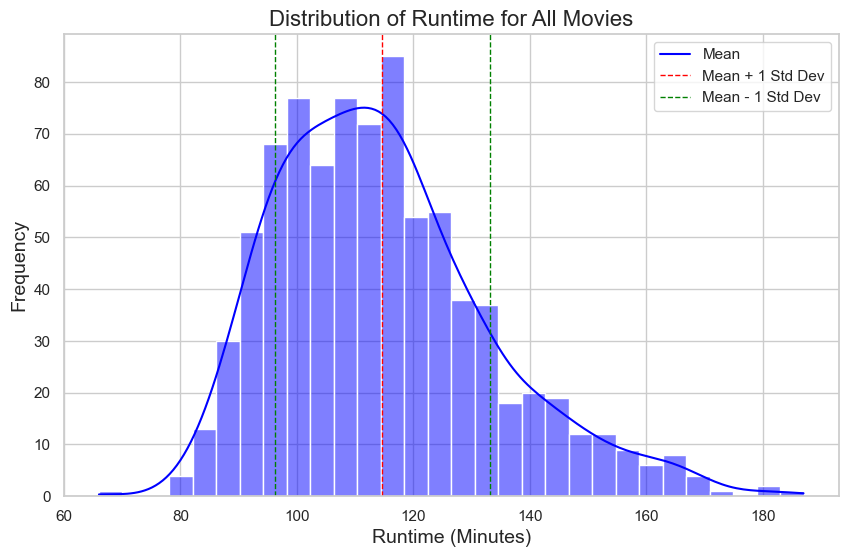

Mean Runtime: 114.64
Standard Deviation of Runtime: 18.47


In [70]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the histogram for Runtime (Minutes)
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(movie_cleared["Runtime (Minutes)"], bins=30, kde=True, color='blue')

# Adding title and labels
hist_plot.set_title("Distribution of Runtime for All Movies", fontsize=16)
hist_plot.set_xlabel("Runtime (Minutes)", fontsize=14)
hist_plot.set_ylabel("Frequency", fontsize=14)

# Adding mean and standard deviation lines
mean_runtime = movie_cleared["Runtime (Minutes)"].mean()
std_runtime = movie_cleared["Runtime (Minutes)"].std()

plt.axvline(mean_runtime, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_runtime + std_runtime, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_runtime - std_runtime, color='green', linestyle='dashed', linewidth=1)

# Adding legend
plt.legend({'Mean': mean_runtime, 'Mean + 1 Std Dev': mean_runtime + std_runtime, 'Mean - 1 Std Dev': mean_runtime - std_runtime})

# Display the plot
plt.show()

#Rounding the mean and standard deviation to two decimal places
mean_runtime = round(mean_runtime, 2)
std_runtime = round(std_runtime, 2)

# Print mean and standard deviation
print(f"Mean Runtime: {mean_runtime}")
print(f"Standard Deviation of Runtime: {std_runtime}")

In [71]:
# Find the film with the longest runtime
longest_runtime_film = movie_cleared.loc[movie_cleared["Runtime (Minutes)"].idxmax()]

# Find the film with the shortest runtime
shortest_runtime_film = movie_cleared.loc[movie_cleared["Runtime (Minutes)"].idxmin()]

print("Film with the longest runtime:")
print(longest_runtime_film[["Title", "Runtime (Minutes)"]])

print("\nFilm with the shortest runtime:")
print(shortest_runtime_film[["Title", "Runtime (Minutes)"]])

Film with the longest runtime:
Title                The Hateful Eight
Runtime (Minutes)                  187
Name: 88, dtype: object

Film with the shortest runtime:
Title                Ma vie de Courgette
Runtime (Minutes)                     66
Name: 793, dtype: object
